In [2]:
import pandas as pd

# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Iterate over the file chunk by chunk
for chunk in pd.read_csv('tweets.csv', chunksize=10):

    # Iterate over the column in DataFrame
    for entry in chunk['lang']:
        if entry in counts_dict.keys():
            counts_dict[entry] += 1
        else:
            counts_dict[entry] = 1

# Print the populated dictionary
print(counts_dict)


{'en': 97, 'et': 1, 'und': 2}


In [3]:
# Define count_entries()
def count_entries(csv_file, c_size, colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Iterate over the file chunk by chunk
    for chunk in pd.read_csv(csv_file, chunksize=c_size):

        # Iterate over the column in DataFrame
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    # Return counts_dict
    return counts_dict

# Call count_entries(): result_counts
result_counts = count_entries('tweets.csv', 10, 'lang')

# Print result_counts
print(result_counts)


{'en': 97, 'et': 1, 'und': 2}


In [4]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member for member in fellowship if len(member) >= 7]

# Print the new list
print(new_fellowship)


['samwise', 'aragorn', 'legolas', 'boromir']


In [5]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member if len(member) >= 7 else "" for member in fellowship]

# Print the new list
print(new_fellowship)


['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']


In [7]:
# Open a connection to the file
with open('world_ind_pop_data.csv') as file:

    # Skip the column names
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(0, 1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)


{'Arab World': 5, 'Caribbean small states': 5, 'Central Europe and the Baltics': 5, 'East Asia & Pacific (all income levels)': 5, 'East Asia & Pacific (developing only)': 5, 'Euro area': 5, 'Europe & Central Asia (all income levels)': 5, 'Europe & Central Asia (developing only)': 5, 'European Union': 5, 'Fragile and conflict affected situations': 5, 'Heavily indebted poor countries (HIPC)': 5, 'High income': 5, 'High income: nonOECD': 5, 'High income: OECD': 5, 'Latin America & Caribbean (all income levels)': 5, 'Latin America & Caribbean (developing only)': 5, 'Least developed countries: UN classification': 5, 'Low & middle income': 5, 'Low income': 5, 'Lower middle income': 5, 'Middle East & North Africa (all income levels)': 5, 'Middle East & North Africa (developing only)': 5, 'Middle income': 5, 'North America': 5, 'OECD members': 5, 'Other small states': 5, 'Pacific island small states': 5, 'Small states': 5, 'South Asia': 5, 'Sub-Saharan Africa (all income levels)': 5, 'Sub-Saha

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


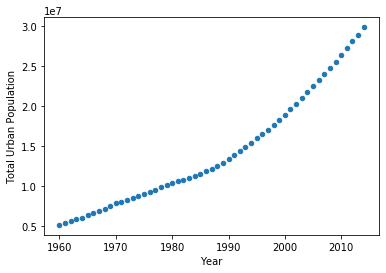

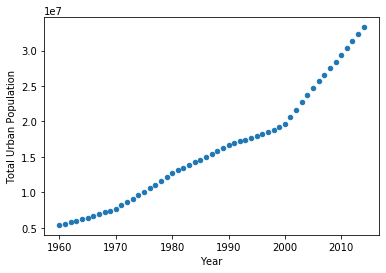

In [14]:
import matplotlib.pyplot as plt 
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'world_ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fn, 'VNM')

# Call plot_pop for country code 'CEB'
plot_pop(fn, 'THA')
